## Perceptron multicapa MLP

Kevin Jafet Moran Orozco

Un perceptrón multicapa (MLP, por sus siglas en inglés) es un tipo de red neuronal artificial, compuesta por varias capas de nodos (neuronas), que se utiliza para resolver problemas de clasificación y regresión. Es una extensión del perceptrón simple, el cual solo tiene una capa de entrada y una capa de salida.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Función de activación sigmoide y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# Clase para el perceptrón multicapa
class MLP:
  def __init__(self, input_size, hidden_size, output_size):
    # Inicialización de los pesos y sesgos
    self.weights_input_hidden = np.random.rand(input_size, hidden_size)
    self.weights_hidden_output = np.random.rand(hidden_size, output_size)
    # sesgos
    self.bias_hidden = np.random.rand(1, hidden_size)
    self.bias_output = np.random.rand(1, output_size)

  def backward(self, X, y, output, learning_rate):
        # Calcular el error
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Propagar el error hacia atrás (backpropagation)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Actualizar pesos y sesgos
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

  def forward(self, X):
    # Paso hacia adelante (forward propagation)
    self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
    self.hidden_output = sigmoid(self.hidden_input)
    self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
    self.final_output = sigmoid(self.final_input)
    return self.final_output

  def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Paso hacia adelante
            output = self.forward(X)
            # Paso hacia atrás
            self.backward(X, y, output, learning_rate)

            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Pérdida: {loss:.6f}")

  def predict(self, X):
    output = self.forward(X)
    return np.argmax(output, axis=1)

  def show_weights(self):
    print("Pesos de la capa oculta:")
    print(self.weights_input_hidden)
    print("Pesos de la capa de salida:")
    print(self.weights_hidden_output)

  def plot_decision_boundary(self, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = self.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


Prueba con XOR

Epoch 0, Pérdida: 0.266716
Epoch 1000, Pérdida: 0.249518
Epoch 2000, Pérdida: 0.247980
Epoch 3000, Pérdida: 0.242107
Epoch 4000, Pérdida: 0.222909
Epoch 5000, Pérdida: 0.197943
Epoch 6000, Pérdida: 0.185162
Epoch 7000, Pérdida: 0.179222
Epoch 8000, Pérdida: 0.176012
Epoch 9000, Pérdida: 0.174049
Pesos de la capa oculta:
[[5.03811932 4.62463423]
 [5.03829957 4.6213087 ]]
Pesos de la capa de salida:
[[2.98871173]
 [2.29478559]]

Resultados después del entrenamiento:
[[0.08672174]
 [0.65871399]
 [0.65873197]
 [0.67118914]]


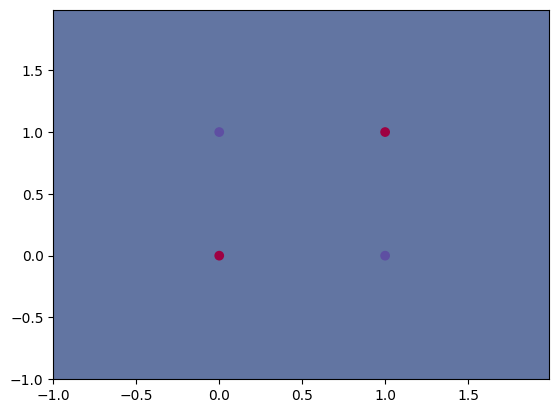

In [ ]:
# Datos de entrada (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Resultados esperados (XOR)
y = np.array([[0], [1], [1], [0]])

# Parámetros del modelo
input_size = 2   # Dos entradas
hidden_size = 2  # Dos neuronas en la capa oculta
output_size = 1  # Una salida

# Crear el perceptrón multicapa
mlp = MLP(input_size, hidden_size, output_size)

# Entrenar el modelo
mlp.train(X, y, epochs=10000, learning_rate=0.1)

# Pesos del modelo
mlp.show_weights()

# Probar el modelo
print("\nResultados después del entrenamiento:")
print(mlp.forward(X))

# Graficamos los resultados
mlp.plot_decision_boundary(X, y)

datase de Iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Preprocesamiento y carga del conjunto de datos Iris
def load_and_preprocess_iris():
    # Cargar el conjunto de datos Iris
    iris = load_iris()
    X = iris.data
    y = iris.target.reshape(-1, 1)

    # Escalamiento de los datos para mejorar la eficiencia del entrenamiento
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Codificación one-hot de las etiquetas de salida (3 clases)
    encoder = OneHotEncoder(sparse_output=False)
    y = encoder.fit_transform(y)

    # División en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, encoder, iris

In [ ]:
# Función para graficar resultados
def plot_results(X, y_true, y_pred, feature_1, feature_2, iris):
    plt.figure(figsize=(10, 6))

    # Colores diferentes para cada clase
    colors = ['red', 'green', 'blue']
    labels = iris.target_names

    # Graficamos las predicciones
    for i in range(3):  # Hay 3 clases en el dataset Iris
        plt.scatter(X[y_pred == i, feature_1], X[y_pred == i, feature_2],
                    color=colors[i], label=f'Predicción {labels[i]}', marker='x', alpha=0.6)

    # Graficamos las etiquetas reales
    for i in range(3):
        plt.scatter(X[y_true == i, feature_1], X[y_true == i, feature_2],
                    color=colors[i], label=f'Real {labels[i]}', marker='o', edgecolor='k', alpha=0.4)

    plt.xlabel(iris.feature_names[feature_1])
    plt.ylabel(iris.feature_names[feature_2])
    plt.title("Comparación entre predicciones y etiquetas reales")
    plt.legend()
    plt.show()

Epoch 0, Pérdida: 0.528594
Epoch 1000, Pérdida: 0.019838
Epoch 2000, Pérdida: 0.012767
Epoch 3000, Pérdida: 0.011393
Epoch 4000, Pérdida: 0.010848
Epoch 5000, Pérdida: 0.010562
Epoch 6000, Pérdida: 0.010385
Epoch 7000, Pérdida: 0.010257
Epoch 8000, Pérdida: 0.010151
Epoch 9000, Pérdida: 0.010040

Precisión en el conjunto de prueba: 100.00%


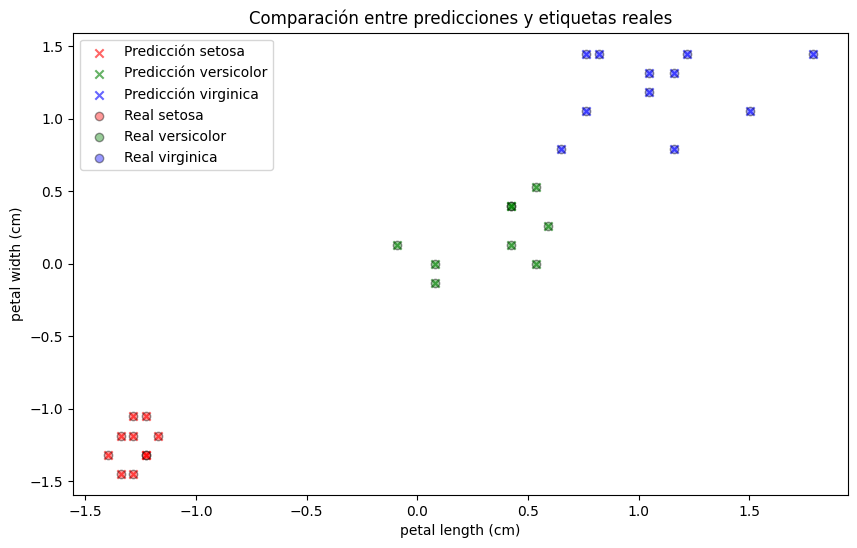

In [ ]:
X_train, X_test, y_train, y_test, encoder, iris = load_and_preprocess_iris()

# Parámetros del MLP
input_size = X_train.shape[1]  # 4 entradas (características del iris)
hidden_size = 5                # 5 neuronas en la capa oculta (ajustable)
output_size = y_train.shape[1] # 3 clases de salida (setosa, versicolor, virginica)

# Crear el perceptrón multicapa
mlp = MLP(input_size, hidden_size, output_size)

# Entrenar el modelo
mlp.train(X_train, y_train, epochs=10000, learning_rate=0.01)

# Probar el modelo
predictions = mlp.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)

# Calcular la precisión
accuracy = np.mean(predictions == y_test_labels)
print(f"\nPrecisión en el conjunto de prueba: {accuracy * 100:.2f}%")

# Graficar los resultados
# Elegimos dos características para graficar, en este caso la 2 (largo del pétalo) y la 3 (ancho del pétalo)
plot_results(X_test, y_test_labels, predictions, 2, 3, iris)

## Conclusión

En esta práctica, desarrollamos un perceptrón multicapa (MLP) desde cero en Python y lo aplicamos primero al conjunto de datos XOR y luego al conjunto Iris. Obtuvimos errores como la comparación incorrecta entre predicciones y etiquetas en formato "one-hot", y luego ajustamos el código para calcular correctamente la precisión. Además, incorporamos una visualización gráfica que permite comparar las predicciones del modelo con las etiquetas reales en el conjunto de prueba, lo que facilita la interpretación de los resultados del MLP.

Aprendí a implementar y entrenar un MLP simple, a manejar problemas comunes de formato de datos en la clasificación multiclase, y a visualizar los resultados utilizando gráficos de dispersión, lo que ayuda a evaluar visualmente el rendimiento del modelo en el conjunto de datos Iris.